<a href="https://colab.research.google.com/github/mashasiri/MASARBootcamp/blob/main/data_scientist_salary__dataset_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Data Scientist salary Dataset
---
**Objective:**

In this notebook, we are going to create some visualizations to better explore our dataset and clean it as a next step.

# Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

### Data Description

To conduct this analysis, a dataset containing relevant information about Data Scientists was used. The dataset includes the following variables:

- work_year:The year the salary was paid.

- experience_level: The experience level in the job during the year.

EN > Entry-level / Junior
MI> Mid-level / Intermediate
SE > Senior-level / Expert
EX > Executive-level / Director
- employment_type: The type of employment for the role.

PT > Part-time
FT > Full-time
CT > Contract
FL > Freelance
- job_title: The role worked in during the year.

- salary: The total gross salary amount paid.

- salary_currency: The currency of the salary paid as an ISO 4217 currency code.

- salaryinusd: The salary in USD.

- employee_residence: Employee's primary country of residence during the work year as an ISO 3166 country code.

- remote_ratio:The overall amount of work done remotely.

- company_location: The country of the employer's main office or contracting branch.

- company_size: The median number of people that worked for the company during the year.
The goal of analyzing the Titanic dataset is often to explore patterns and factors that influenced the survival of passengers during the tragic event.

In [63]:

# Load the DS salaries dataset into a DataFrame
df = pd.read_csv('/content/ds_salaries.csv')

df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# 1. Explore the Dataset

## 1.1 Diagnose data for cleaning

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

- .head() returns the first few rows (the “head” of the DataFrame).
- .tail() returns the last few rows (the “tail” of the DataFrame).
- .info() shows information on each of the columns, such as the data type and number of missing values.
- .shape returns the number of rows and columns of the DataFrame.
- .columns: An index of columns: the column names.


In [64]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [65]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [67]:
df.shape

(3755, 11)

In [68]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

## 1.2 Exploratory data analysis

### Check for missing Values

 Missing data can affect your analysis and models. Determine if any columns have missing values and decide how to handle them.

In [69]:
df.isnull().sum() # Count of missing values in each column


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Explore descriptive statistics

In [70]:
df.describe() # Summary statistics for numerical columns


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000



```
# This is formatted as code
```

### Data Types

Check Unique Values for df column to know whether column type is correct or not

In [71]:
for i in df.columns:
    x = df[i].value_counts()
    print("Column name ",i," has different values of:",len(x))

Column name  work_year  has different values of: 4
Column name  experience_level  has different values of: 4
Column name  employment_type  has different values of: 4
Column name  job_title  has different values of: 93
Column name  salary  has different values of: 815
Column name  salary_currency  has different values of: 20
Column name  salary_in_usd  has different values of: 1035
Column name  employee_residence  has different values of: 78
Column name  remote_ratio  has different values of: 3
Column name  company_location  has different values of: 72
Column name  company_size  has different values of: 3


In [72]:
#check the experience_level column values if there is entering error
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [74]:
#check the employment_type column values if there is entering error
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [73]:
#check the job_title column values if there is entering error
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [18]:
#check the salary_currency column values if there is entering error
df['salary_currency'].unique()


array(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD',
       'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN',
       'TRY', 'CLP'], dtype=object)

In [23]:
#check the employee_residence column values if there is entering error
df['employee_residence'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [24]:
#check the company_location column values if there is entering error
df['company_location'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [25]:
#check the company_location column values if there is entering error
df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

According to the unqiue values per each column the following columns should be change to
1. **categorical columns:**   experience_level,employment_type, job_title, salary_currency, employee_residence, company_location,company_size

2. **int:** work_year,salary, salary in used, remote ratio.


In [75]:
df_cat=df[['experience_level','employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location','company_size']]

for i in df_cat.columns:
    x = df_cat[i].value_counts()
    print("Column name is:",i,"and its value counts are:")
    print(x)
    print()

Column name is: experience_level and its value counts are:
SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

Column name is: employment_type and its value counts are:
FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

Column name is: job_title and its value counts are:
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

Column name is: salary_currency and its value counts are:
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6

### Data Visualization

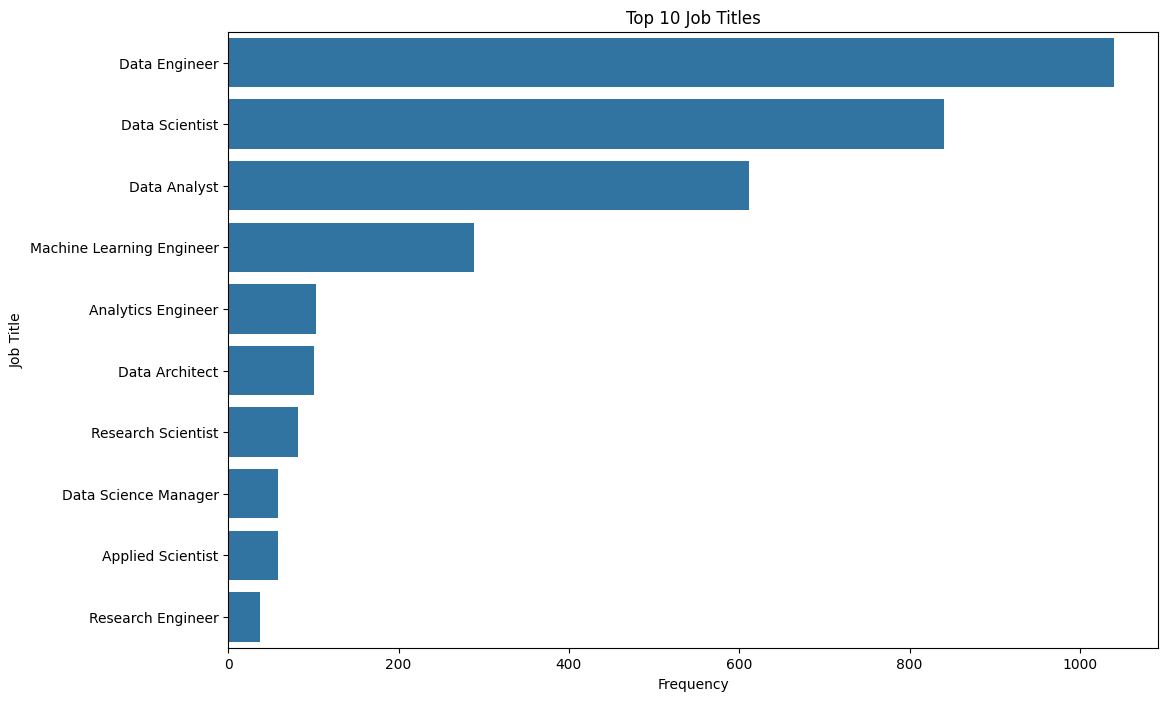

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# bar Chart for job title
# Assuming 'df' is your DataFrame and 'job_title' is the column of interest
# First, calculate the counts of each job title
job_title_counts = df['job_title'].value_counts().nlargest(10)

# Now, create a bar chart
plt.figure(figsize=(12, 8)) # You can adjust the size to fit your needs
sns.barplot(x=job_title_counts.values, y=job_title_counts.index)

# Add title and labels to the plot
plt.title('Top 10 Job Titles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')

# Show the plot
plt.show()


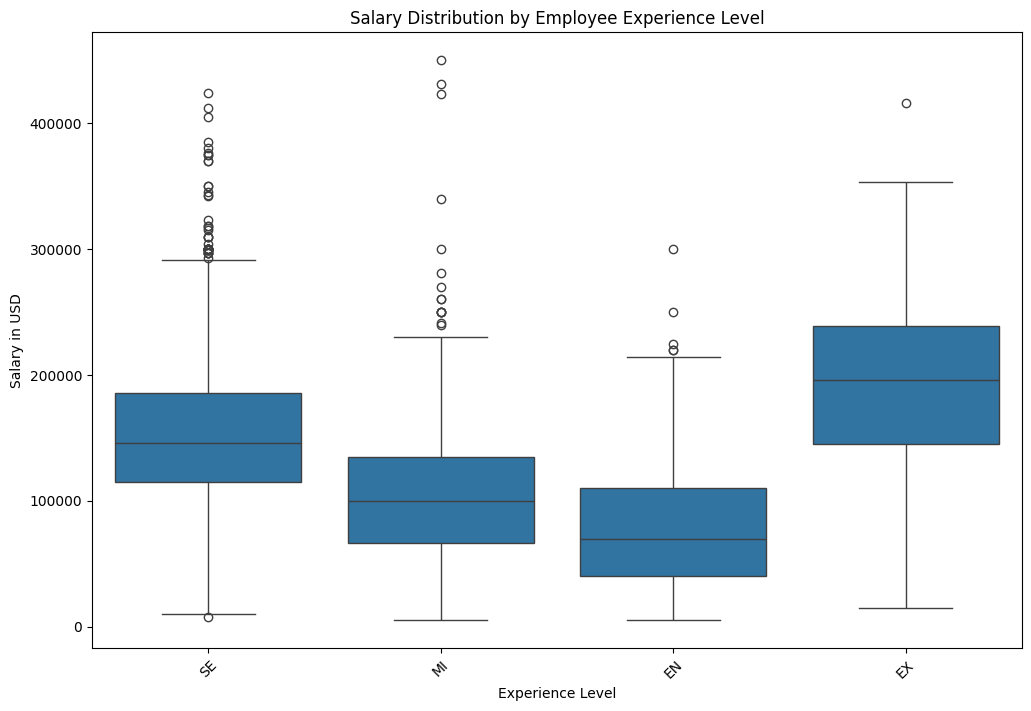

In [38]:
# Box Plot Chart for Experience Level and salary_in_usd
# Assuming 'df' is your DataFrame, 'salary_in_usd' is the numerical salary column,
# and 'experience_level' is the categorical employee experience column.
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)

plt.title('Salary Distribution by Employee Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)  # Rotate the x labels if they overlap or are too long
plt.show()

<ipython-input-44-4efddab488d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


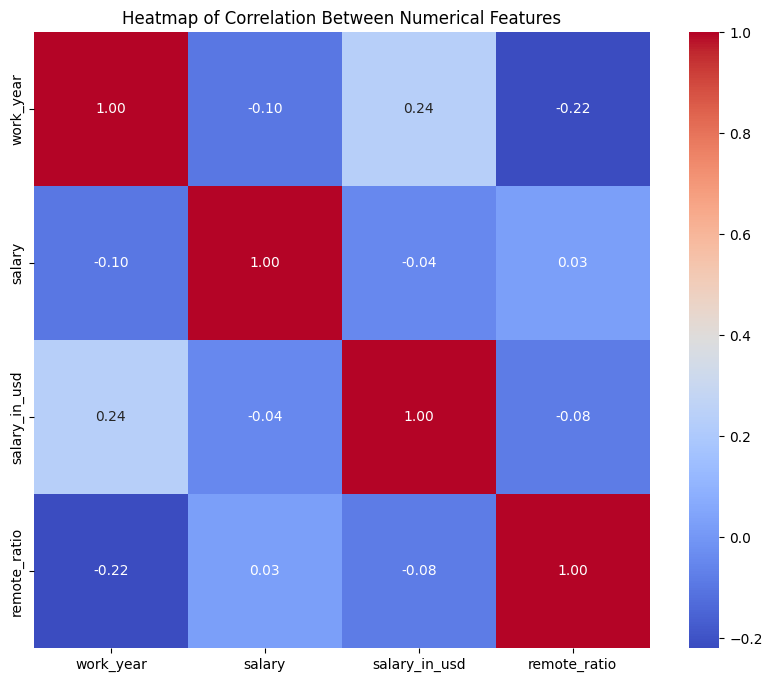

In [44]:
# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Add title
plt.title('Heatmap of Correlation Between Numerical Features')

# Show the plot
plt.show()

## 1.3 Cleaning

### Handling Missing Values

No missing data on this dataset

In [76]:
# check duplicated rows
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
3750    False
3751    False
3752    False
3753    False
3754    False
Length: 3755, dtype: bool

In [77]:
# remove duplicated rows
df.drop_duplicates(inplace=True)

In [78]:
# check number of rows after removed the duplication
df.shape

(2584, 11)

### Data Encoding for catagoical columns (preprocessing)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
 11  job_title_encoded   2584 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 262.4+ KB


In [81]:
# encoding 'experience_level' is the column with job titles.
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
df['experience_level_encoded'] = label_encoder.fit_transform(df['experience_level'])

# Now df['job_title_encoded'] contains the encoded values for the job titles
df['experience_level_encoded']

0       3
1       2
2       2
3       3
4       3
       ..
3750    3
3751    2
3752    0
3753    0
3754    3
Name: experience_level_encoded, Length: 2584, dtype: int64

In [82]:
# encoding 'employment_type' is the column with job titles.
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
df['employment_type_encoded'] = label_encoder.fit_transform(df['employment_type'])

# Now df['job_title_encoded'] contains the encoded values for the job titles
df['employment_type_encoded']

0       2
1       0
2       0
3       2
4       2
       ..
3750    2
3751    2
3752    2
3753    0
3754    2
Name: employment_type_encoded, Length: 2584, dtype: int64

In [79]:
# encoding 'job_title' is the column with job titles.
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
df['job_title_encoded'] = label_encoder.fit_transform(df['job_title'])

# Now df['job_title_encoded'] contains the encoded values for the job titles
df['job_title_encoded']

0       84
1       66
2       66
3       47
4       47
        ..
3750    47
3751    84
3752    47
3753    17
3754    45
Name: job_title_encoded, Length: 2584, dtype: int64

In [85]:
# encoding 'salary_currency' is the column with job titles.
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
df['salary_currency_encoded'] = label_encoder.fit_transform(df['salary_currency'])

# Now df['job_title_encoded'] contains the encoded values for the job titles
df['salary_currency_encoded']

0        7
1       19
2       19
3       19
4       19
        ..
3750    19
3751    19
3752    19
3753    19
3754    12
Name: salary_currency_encoded, Length: 2584, dtype: int64

In [87]:

# encoding 'employee_residence' is the column with job titles.
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
df['employee_residence_encoded'] = label_encoder.fit_transform(df['employee_residence'])

# Now df['job_title_encoded'] contains the encoded values for the job titles
df['employee_residence_encoded']

0       26
1       75
2       75
3       11
4       11
        ..
3750    75
3751    75
3752    75
3753    75
3754    39
Name: employee_residence_encoded, Length: 2584, dtype: int64

In [91]:
# encoding 'company_location' is the column with job titles.
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
df['company_location_encoded'] = label_encoder.fit_transform(df['company_location'])

# Now df['job_title_encoded'] contains the encoded values for the job titles
df['company_location_encoded']

0       25
1       70
2       70
3       12
4       12
        ..
3750    70
3751    70
3752    70
3753    70
3754    38
Name: company_location_encoded, Length: 2584, dtype: int64

In [90]:
# encoding 'company_size ' is the column with job titles.
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
df['company_size_encoded'] = label_encoder.fit_transform(df['company_size'])

# Now df['job_title_encoded'] contains the encoded values for the job titles
df['company_size_encoded']

0       0
1       2
2       2
3       1
4       1
       ..
3750    0
3751    0
3752    2
3753    0
3754    0
Name: company_size_encoded, Length: 2584, dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   work_year                   2584 non-null   int64 
 1   experience_level            2584 non-null   object
 2   employment_type             2584 non-null   object
 3   job_title                   2584 non-null   object
 4   salary                      2584 non-null   int64 
 5   salary_currency             2584 non-null   object
 6   salary_in_usd               2584 non-null   int64 
 7   employee_residence          2584 non-null   object
 8   remote_ratio                2584 non-null   int64 
 9   company_location            2584 non-null   object
 10  company_size                2584 non-null   object
 11  job_title_encoded           2584 non-null   int64 
 12  experience_level_encoded    2584 non-null   int64 
 13  employment_type_encoded     2584 non-null   int6

###Normalization and Standarization of data to convert it from 0 to 1

In [93]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'df' is your DataFrame

# Initialize the MinMaxScaler to scale the data between 0 and 1
scaler = MinMaxScaler()

# Select the numerical (int64 and float64) columns in the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Fit the scaler to the data and then transform it
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [94]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_encoded,experience_level_encoded,employment_type_encoded,salary_currency_encoded,employee_residence_encoded,company_location_encoded,company_size_encoded
0,1.0,SE,FT,Principal Data Scientist,0.002435,EUR,0.181436,ES,1.0,ES,L,0.913043,1.000000,0.666667,0.368421,0.337662,0.352113,0.0
1,1.0,MI,CT,ML Engineer,0.000790,USD,0.055900,US,1.0,US,S,0.717391,0.666667,0.000000,1.000000,0.974026,0.985915,1.0
2,1.0,MI,CT,ML Engineer,0.000642,USD,0.045784,US,1.0,US,S,0.717391,0.666667,0.000000,1.000000,0.974026,0.985915,1.0
3,1.0,SE,FT,Data Scientist,0.005560,USD,0.381839,CA,1.0,CA,M,0.510870,1.000000,0.666667,1.000000,0.142857,0.169014,0.5
4,1.0,SE,FT,Data Scientist,0.003751,USD,0.258207,CA,1.0,CA,M,0.510870,1.000000,0.666667,1.000000,0.142857,0.169014,0.5


## 1.4 Feature Correlation

<ipython-input-95-4efddab488d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


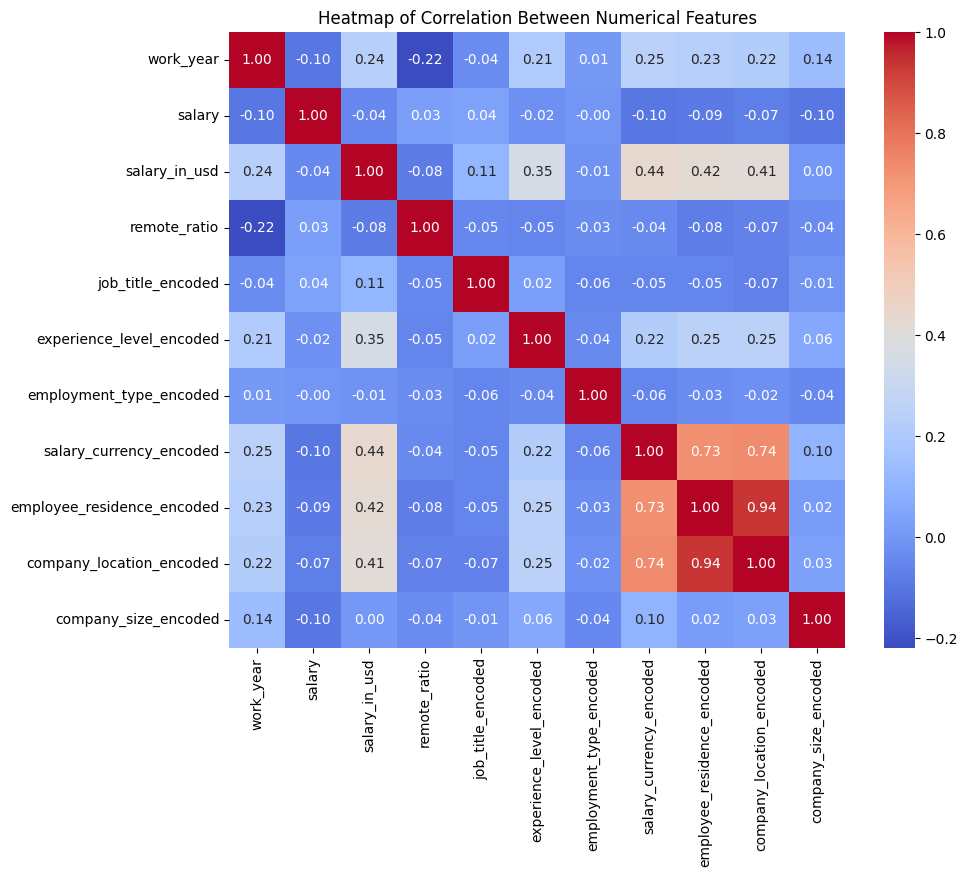

In [95]:
# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Add title
plt.title('Heatmap of Correlation Between Numerical Features')

# Show the plot
plt.show()